## Import Library

In [379]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## Gathering Data

In [468]:
df_std = pd.read_csv('./datasets/AWOS Middle/L0250206.csv')
df_uut = pd.read_csv('./datasets/AWOS Middle/PLM_MG_0506feb.csv')

In [469]:
df_std.head()

,Unnamed: 0,Unnamed: 1,PressureMeas_1m,Unnamed: 3,TAStat155_1m_1,Unnamed: 5,RHStat155_1m_1,Unnamed: 7,SRMeasQMS101R_1m,Unnamed: 9,...,QFE_1m,Unnamed: 13,QNH_1m,Unnamed: 15,WS_1m,Unnamed: 17,WD_1m,Unnamed: 19,TGMeasQMT103_1m,Unnamed: 21
0,time,status,Avg,status,Avg,status,Avg,status,Avg,status,...,QF,status,QNH,status,Avg,status,Avg,status,Avg,NaN
1,2/6/25 12:00:07 AM,VALID,1008.206,VALID,24.297,VALID,94.981,VALID,51.649,VALID,...,1008.206,VALID,1008.062,VALID,1.67,VALID,311.773,INVALID,0.0,NaN
2,2/6/25 12:01:06 AM,VALID,1008.227,VALID,24.299,VALID,94.936,VALID,53.108,VALID,...,1008.227,VALID,1008.083,VALID,1.831,VALID,326.312,INVALID,0.0,NaN
3,2/6/25 12:02:06 AM,VALID,1008.227,VALID,24.325,VALID,94.932,VALID,54.529,VALID,...,1008.227,VALID,1008.084,VALID,0.834,VALID,284.182,INVALID,0.0,NaN
4,2/6/25 12:03:07 AM,VALID,1008.224,VALID,24.341,VALID,94.963,VALID,55.793,VALID,...,1008.224,VALID,1008.081,VALID,1.248,VALID,320.443,INVALID,0.0,NaN


In [470]:
df_uut.head()

,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,05/02/2025 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,05/02/2025 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,05/02/2025 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,05/02/2025 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,05/02/2025 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


## Preprocessing Data

### Data Alat Standard

Atur ulang header data

In [473]:
df_std.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'PressureMeas_1m', 'Unnamed: 3',
       'TAStat155_1m_1', 'Unnamed: 5', 'RHStat155_1m_1', 'Unnamed: 7',
       'SRMeasQMS101R_1m', 'Unnamed: 9', 'PRMeasQMR101_1', 'Unnamed: 11',
       'QFE_1m', 'Unnamed: 13', 'QNH_1m', 'Unnamed: 15', 'WS_1m',
       'Unnamed: 17', 'WD_1m', 'Unnamed: 19', 'TGMeasQMT103_1m',
       'Unnamed: 21'],
      dtype='object')

In [474]:
df_std.head()

,Unnamed: 0,Unnamed: 1,PressureMeas_1m,Unnamed: 3,TAStat155_1m_1,Unnamed: 5,RHStat155_1m_1,Unnamed: 7,SRMeasQMS101R_1m,Unnamed: 9,...,QFE_1m,Unnamed: 13,QNH_1m,Unnamed: 15,WS_1m,Unnamed: 17,WD_1m,Unnamed: 19,TGMeasQMT103_1m,Unnamed: 21
0,time,status,Avg,status,Avg,status,Avg,status,Avg,status,...,QF,status,QNH,status,Avg,status,Avg,status,Avg,NaN
1,2/6/25 12:00:07 AM,VALID,1008.206,VALID,24.297,VALID,94.981,VALID,51.649,VALID,...,1008.206,VALID,1008.062,VALID,1.67,VALID,311.773,INVALID,0.0,NaN
2,2/6/25 12:01:06 AM,VALID,1008.227,VALID,24.299,VALID,94.936,VALID,53.108,VALID,...,1008.227,VALID,1008.083,VALID,1.831,VALID,326.312,INVALID,0.0,NaN
3,2/6/25 12:02:06 AM,VALID,1008.227,VALID,24.325,VALID,94.932,VALID,54.529,VALID,...,1008.227,VALID,1008.084,VALID,0.834,VALID,284.182,INVALID,0.0,NaN
4,2/6/25 12:03:07 AM,VALID,1008.224,VALID,24.341,VALID,94.963,VALID,55.793,VALID,...,1008.224,VALID,1008.081,VALID,1.248,VALID,320.443,INVALID,0.0,NaN


In [475]:
set_col_std = ['timestamp', 'statP', 'PressureMeas_1m', 'statTA',
       'TAStat155_1m_1', 'statRH', 'RHStat155_1m_1', 'statSR',
       'SRMeasQMS101R_1m', 'StatPR', 'PRMeasQMR101_1', 'StatQFE',
       'QFE_1m', 'StatQNH', 'QNH_1m', 'StatWS', 'WS_1m',
       'StatWD', 'WD_1m', 'StatTG', 'TGMeasQMT103_1m']
    
df_std = df_std.drop(columns='Unnamed: 21') #hapus kolom lebih
df_std = df_std.drop([0])
df_std.columns = set_col_std #ubah format header standar
df_std.head()

,timestamp,statP,PressureMeas_1m,statTA,TAStat155_1m_1,statRH,RHStat155_1m_1,statSR,SRMeasQMS101R_1m,StatPR,...,StatQFE,QFE_1m,StatQNH,QNH_1m,StatWS,WS_1m,StatWD,WD_1m,StatTG,TGMeasQMT103_1m
1,2/6/25 12:00:07 AM,VALID,1008.206,VALID,24.297,VALID,94.981,VALID,51.649,VALID,...,VALID,1008.206,VALID,1008.062,VALID,1.67,VALID,311.773,INVALID,0.0
2,2/6/25 12:01:06 AM,VALID,1008.227,VALID,24.299,VALID,94.936,VALID,53.108,VALID,...,VALID,1008.227,VALID,1008.083,VALID,1.831,VALID,326.312,INVALID,0.0
3,2/6/25 12:02:06 AM,VALID,1008.227,VALID,24.325,VALID,94.932,VALID,54.529,VALID,...,VALID,1008.227,VALID,1008.084,VALID,0.834,VALID,284.182,INVALID,0.0
4,2/6/25 12:03:07 AM,VALID,1008.224,VALID,24.341,VALID,94.963,VALID,55.793,VALID,...,VALID,1008.224,VALID,1008.081,VALID,1.248,VALID,320.443,INVALID,0.0
5,2/6/25 12:04:06 AM,VALID,1008.233,VALID,24.325,VALID,94.843,VALID,56.984,VALID,...,VALID,1008.233,VALID,1008.09,VALID,1.986,VALID,319.78,INVALID,0.0


Hapus kolom yang tidak penting

In [476]:
df_std.columns

Index(['timestamp', 'statP', 'PressureMeas_1m', 'statTA', 'TAStat155_1m_1',
       'statRH', 'RHStat155_1m_1', 'statSR', 'SRMeasQMS101R_1m', 'StatPR',
       'PRMeasQMR101_1', 'StatQFE', 'QFE_1m', 'StatQNH', 'QNH_1m', 'StatWS',
       'WS_1m', 'StatWD', 'WD_1m', 'StatTG', 'TGMeasQMT103_1m'],
      dtype='object')

In [477]:
df_std = df_std.drop(columns={'StatTG','TGMeasQMT103_1m'})
df_std.head()

,timestamp,statP,PressureMeas_1m,statTA,TAStat155_1m_1,statRH,RHStat155_1m_1,statSR,SRMeasQMS101R_1m,StatPR,PRMeasQMR101_1,StatQFE,QFE_1m,StatQNH,QNH_1m,StatWS,WS_1m,StatWD,WD_1m
1,2/6/25 12:00:07 AM,VALID,1008.206,VALID,24.297,VALID,94.981,VALID,51.649,VALID,0.0,VALID,1008.206,VALID,1008.062,VALID,1.67,VALID,311.773
2,2/6/25 12:01:06 AM,VALID,1008.227,VALID,24.299,VALID,94.936,VALID,53.108,VALID,0.0,VALID,1008.227,VALID,1008.083,VALID,1.831,VALID,326.312
3,2/6/25 12:02:06 AM,VALID,1008.227,VALID,24.325,VALID,94.932,VALID,54.529,VALID,0.0,VALID,1008.227,VALID,1008.084,VALID,0.834,VALID,284.182
4,2/6/25 12:03:07 AM,VALID,1008.224,VALID,24.341,VALID,94.963,VALID,55.793,VALID,0.0,VALID,1008.224,VALID,1008.081,VALID,1.248,VALID,320.443
5,2/6/25 12:04:06 AM,VALID,1008.233,VALID,24.325,VALID,94.843,VALID,56.984,VALID,0.0,VALID,1008.233,VALID,1008.09,VALID,1.986,VALID,319.78


Hapus data **INVALID**

In [478]:
status_cols = [col for col in df_std.columns if col.lower().startswith("stat")]
if status_cols:
    invalid_mask = df_std[status_cols].apply(lambda row: row.str.upper().str.contains("INVALID"), axis=1).any(axis=1)
    df_std = df_std[~invalid_mask]

Hapus data kosong

In [479]:
df_std.isna().sum()

timestamp           0
statP               0
PressureMeas_1m     0
statTA              0
TAStat155_1m_1      0
statRH              0
RHStat155_1m_1      0
statSR              0
SRMeasQMS101R_1m    0
StatPR              0
PRMeasQMR101_1      0
StatQFE             0
QFE_1m              0
StatQNH             0
QNH_1m              0
StatWS              0
WS_1m               0
StatWD              0
WD_1m               0
dtype: int64

Sesuaikan tipe data tiap kolom

In [480]:
df_std['timestamp'] = pd.to_datetime(df_std['timestamp'],format="%m/%d/%y %I:%M:%S %p",errors='coerce')
if status_cols:
    df_std = df_std.drop(columns=status_cols)
exclude_cols = ['timestamp']
for col in df_std.columns:
        if col not in exclude_cols:
            df_std[col] = pd.to_numeric(df_std[col], errors='coerce')
df_std.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m
1,2025-02-06 00:00:07,1008.206,24.297,94.981,51.649,0.0,1008.206,1008.062,1.670,311.773
2,2025-02-06 00:01:06,1008.227,24.299,94.936,53.108,0.0,1008.227,1008.083,1.831,326.312
3,2025-02-06 00:02:06,1008.227,24.325,94.932,54.529,0.0,1008.227,1008.084,0.834,284.182
4,2025-02-06 00:03:07,1008.224,24.341,94.963,55.793,0.0,1008.224,1008.081,1.248,320.443
5,2025-02-06 00:04:06,1008.233,24.325,94.843,56.984,0.0,1008.233,1008.090,1.986,319.780


In [481]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 1 to 222
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         222 non-null    datetime64[ns]
 1   PressureMeas_1m   222 non-null    float64       
 2   TAStat155_1m_1    222 non-null    float64       
 3   RHStat155_1m_1    222 non-null    float64       
 4   SRMeasQMS101R_1m  222 non-null    float64       
 5   PRMeasQMR101_1    222 non-null    float64       
 6   QFE_1m            222 non-null    float64       
 7   QNH_1m            222 non-null    float64       
 8   WS_1m             222 non-null    float64       
 9   WD_1m             222 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.5 KB


Cek Anomali Data

In [482]:
df_std.describe(include='all')

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m
count,222,222.000000,222.000000,222.000000,222.000000,222.0,222.000000,222.000000,222.000000,222.000000
mean,2025-02-06 01:50:36.292792832,1008.988955,26.306405,85.278450,324.471117,0.0,1008.988955,1008.845279,2.863180,304.486333
min,2025-02-06 00:00:07,1008.206000,24.297000,71.814000,51.649000,0.0,1008.206000,1008.062000,0.834000,210.793000
25%,2025-02-06 00:55:22,1008.637500,25.310500,81.891750,184.375000,0.0,1008.637500,1008.493750,2.089000,296.569750
50%,2025-02-06 01:50:36,1009.010500,26.416000,85.923000,248.895000,0.0,1009.010500,1008.867000,2.775000,306.703000
75%,2025-02-06 02:45:51,1009.379000,27.152250,89.860250,410.613750,0.0,1009.379000,1009.235750,3.485500,313.068250
max,2025-02-06 03:41:06,1009.652000,28.759000,94.981000,984.236000,0.0,1009.652000,1009.508000,5.446000,332.376000
std,NaN,0.428183,1.229661,6.302221,221.400114,0.0,0.428183,0.428158,0.997086,13.720226


### Data alat UUT

Cek komposisi data 

In [483]:
df_uut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date and Time        1680 non-null   object 
 1   Air Tmp (C) M        1588 non-null   float64
 2   BP 1 Min (inHg) M    1588 non-null   float64
 3   Mag WD (deg) M       1588 non-null   float64
 4   RH (%) M             1588 non-null   float64
 5   Solar Rad (W/m^2) M  1588 non-null   float64
 6   WS (kt) M            1588 non-null   float64
dtypes: float64(6), object(1)
memory usage: 92.0+ KB


Sesuaikan tipe data

In [484]:
df_uut['Date and Time'] = pd.to_datetime(df_uut['Date and Time'], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df_uut.head()

,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-05 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,2025-02-05 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,2025-02-05 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,2025-02-05 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,2025-02-05 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


Hapus data kosong

In [485]:
df_uut = df_uut.dropna()
df_uut.isna().sum()

Date and Time          0
Air Tmp (C) M          0
BP 1 Min (inHg) M      0
Mag WD (deg) M         0
RH (%) M               0
Solar Rad (W/m^2) M    0
WS (kt) M              0
dtype: int64

### Gabung data **Standar** dan **UUT**

Urutkan data

In [486]:
df_standard_sorted = df_std.sort_values(['timestamp'])
df_uut_sorted = df_uut.sort_values(['Date and Time'])

Satukan data

In [487]:
    df_merged = pd.merge_asof(
        df_standard_sorted,
        df_uut_sorted,
        left_on='timestamp',
        right_on='Date and Time',
        direction='nearest',
        tolerance=pd.Timedelta('1min')
    )

Hapus baris data yang tidak lengkap

In [488]:
df_merged.isna().sum()

timestamp               0
PressureMeas_1m         0
TAStat155_1m_1          0
RHStat155_1m_1          0
SRMeasQMS101R_1m        0
PRMeasQMR101_1          0
QFE_1m                  0
QNH_1m                  0
WS_1m                   0
WD_1m                   0
Date and Time          74
Air Tmp (C) M          74
BP 1 Min (inHg) M      74
Mag WD (deg) M         74
RH (%) M               74
Solar Rad (W/m^2) M    74
WS (kt) M              74
dtype: int64

In [489]:
df_merged.dropna()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-06 00:00:07,1008.206,24.297,94.981,51.649,0.0,1008.206,1008.062,1.670,311.773,2025-02-06 00:00:00,24.06,29.77,306.0,99.4,38.5992,3.0
1,2025-02-06 00:01:06,1008.227,24.299,94.936,53.108,0.0,1008.227,1008.083,1.831,326.312,2025-02-06 00:01:00,24.06,29.77,329.0,99.4,40.0288,3.0
2,2025-02-06 00:02:06,1008.227,24.325,94.932,54.529,0.0,1008.227,1008.084,0.834,284.182,2025-02-06 00:02:00,24.11,29.77,19.0,99.4,41.4584,2.0
3,2025-02-06 00:03:07,1008.224,24.341,94.963,55.793,0.0,1008.224,1008.081,1.248,320.443,2025-02-06 00:03:00,24.11,29.77,319.0,99.4,42.8880,3.0
4,2025-02-06 00:04:06,1008.233,24.325,94.843,56.984,0.0,1008.233,1008.090,1.986,319.780,2025-02-06 00:04:00,24.11,29.77,341.0,99.3,44.3176,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2025-02-06 02:23:06,1009.646,26.741,83.524,292.237,0.0,1009.646,1009.502,3.173,301.474,2025-02-06 02:23:00,26.67,29.82,290.0,98.1,228.7360,6.0
144,2025-02-06 02:24:06,1009.651,26.767,83.062,310.611,0.0,1009.651,1009.508,3.176,310.289,2025-02-06 02:24:00,26.56,29.82,330.0,97.5,221.5880,9.0
145,2025-02-06 02:25:06,1009.637,26.756,82.329,278.741,0.0,1009.637,1009.493,3.821,300.525,2025-02-06 02:25:00,26.39,29.82,293.0,97.3,227.3064,6.0
146,2025-02-06 02:26:06,1009.635,26.717,82.785,280.472,0.0,1009.635,1009.491,3.207,300.393,2025-02-06 02:26:00,26.50,29.82,308.0,97.5,260.1872,10.0


In [490]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            222 non-null    datetime64[ns]
 1   PressureMeas_1m      222 non-null    float64       
 2   TAStat155_1m_1       222 non-null    float64       
 3   RHStat155_1m_1       222 non-null    float64       
 4   SRMeasQMS101R_1m     222 non-null    float64       
 5   PRMeasQMR101_1       222 non-null    float64       
 6   QFE_1m               222 non-null    float64       
 7   QNH_1m               222 non-null    float64       
 8   WS_1m                222 non-null    float64       
 9   WD_1m                222 non-null    float64       
 10  Date and Time        148 non-null    datetime64[ns]
 11  Air Tmp (C) M        148 non-null    float64       
 12  BP 1 Min (inHg) M    148 non-null    float64       
 13  Mag WD (deg) M       148 non-null  

In [491]:
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-06 00:00:07,1008.206,24.297,94.981,51.649,0.0,1008.206,1008.062,1.670,311.773,2025-02-06 00:00:00,24.06,29.77,306.0,99.4,38.5992,3.0
1,2025-02-06 00:01:06,1008.227,24.299,94.936,53.108,0.0,1008.227,1008.083,1.831,326.312,2025-02-06 00:01:00,24.06,29.77,329.0,99.4,40.0288,3.0
2,2025-02-06 00:02:06,1008.227,24.325,94.932,54.529,0.0,1008.227,1008.084,0.834,284.182,2025-02-06 00:02:00,24.11,29.77,19.0,99.4,41.4584,2.0
3,2025-02-06 00:03:07,1008.224,24.341,94.963,55.793,0.0,1008.224,1008.081,1.248,320.443,2025-02-06 00:03:00,24.11,29.77,319.0,99.4,42.8880,3.0
4,2025-02-06 00:04:06,1008.233,24.325,94.843,56.984,0.0,1008.233,1008.090,1.986,319.780,2025-02-06 00:04:00,24.11,29.77,341.0,99.3,44.3176,3.0


Hapus sebagian data di awal dan akhir karena sebagian data di awal sensor masih belum stabil, dan sebagian data di akhir saat sensor sedang dilepas

In [492]:
df_merged = df_merged.iloc[70:-70]

## Interpolasi dan Koreksi Data

### Pemetaan Header

In [404]:
df_merged.columns

Index(['timestamp', 'PressureMeas_1m', 'TAStat155_1m_1', 'RHStat155_1m_1',
       'SRMeasQMS101R_1m', 'PRMeasQMR101_1', 'QFE_1m', 'QNH_1m', 'WS_1m',
       'WD_1m', 'Date and Time', 'Air Tmp (C) M', 'BP 1 Min (inHg) M',
       'Mag WD (deg) M', 'RH (%) M', 'Solar Rad (W/m^2) M', 'WS (kt) M'],
      dtype='object')

In [405]:
PP_col = ['PressureMeas_1m','BP 1 Min (inHg) M']
TT_col = ['TAStat155_1m_1','Air Tmp (C) M']
RH_col = ['RHStat155_1m_1','RH (%) M']
WS_col = ['WS_1m','WS (kt) M']
WD_col = ['WD_1m','Mag WD (deg) M']
SR_col = ['SRMeasQMS101R_1m','Solar Rad (W/m^2) M']
WT_col = []

### Konversi Satuan

In [406]:
# Fungsi konversi dari standar ke satuan UUT
def convert_std_to_uut_unit(value, from_unit, to_unit):
    if from_unit == to_unit or "-" in (from_unit, to_unit):
        return value
    if from_unit == "InHg" and to_unit == "hPa":
        return value * 33.86388
    if from_unit == "hPa" and to_unit == "InHg":
        return value / 33.86388
    if from_unit == "m/s" and to_unit == "knot":
        return value / 0.514444
    if from_unit == "knot" and to_unit == "m/s":
        return value * 0.514444
    return value

Konversi Satuan Tekanan **(InHg to hPa)**

In [407]:
df_merged['PP_uut_hPa'] = df_merged[PP_col[1]].apply(lambda x: convert_std_to_uut_unit(x, 'InHg', 'hPa'))
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa
70,2025-02-06 01:10:07,1008.744,25.630,89.400,338.232,0.0,1008.744,1008.601,3.389,295.475,2025-02-06 01:10:00,25.06,29.79,317.0,99.2,224.4472,6.0,1008.804985
71,2025-02-06 01:11:07,1008.755,25.676,88.635,381.833,0.0,1008.755,1008.612,2.629,312.458,2025-02-06 01:11:00,25.17,29.79,301.0,99.3,357.4000,7.0,1008.804985
72,2025-02-06 01:12:07,1008.763,25.724,88.011,458.990,0.0,1008.763,1008.619,2.265,292.304,2025-02-06 01:12:00,25.28,29.79,305.0,99.3,337.3856,3.0,1008.804985
73,2025-02-06 01:13:07,1008.799,25.918,89.274,428.307,0.0,1008.799,1008.655,2.661,298.220,2025-02-06 01:13:00,25.28,29.79,293.0,99.3,285.9200,8.0,1008.804985
74,2025-02-06 01:14:06,1008.837,25.960,88.101,301.653,0.0,1008.837,1008.694,2.567,301.285,2025-02-06 01:14:00,25.39,29.79,314.0,99.3,337.3856,6.0,1008.804985


Konversi Satuan Kecepatan Angin **(knot to m/s)**

In [408]:
df_merged['WS_uut_m/s'] = df_merged[WS_col[1]].apply(lambda x: convert_std_to_uut_unit(x, 'knot', 'm/s'))
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s
70,2025-02-06 01:10:07,1008.744,25.630,89.400,338.232,0.0,1008.744,1008.601,3.389,295.475,2025-02-06 01:10:00,25.06,29.79,317.0,99.2,224.4472,6.0,1008.804985,3.086664
71,2025-02-06 01:11:07,1008.755,25.676,88.635,381.833,0.0,1008.755,1008.612,2.629,312.458,2025-02-06 01:11:00,25.17,29.79,301.0,99.3,357.4000,7.0,1008.804985,3.601108
72,2025-02-06 01:12:07,1008.763,25.724,88.011,458.990,0.0,1008.763,1008.619,2.265,292.304,2025-02-06 01:12:00,25.28,29.79,305.0,99.3,337.3856,3.0,1008.804985,1.543332
73,2025-02-06 01:13:07,1008.799,25.918,89.274,428.307,0.0,1008.799,1008.655,2.661,298.220,2025-02-06 01:13:00,25.28,29.79,293.0,99.3,285.9200,8.0,1008.804985,4.115552
74,2025-02-06 01:14:06,1008.837,25.960,88.101,301.653,0.0,1008.837,1008.694,2.567,301.285,2025-02-06 01:14:00,25.39,29.79,314.0,99.3,337.3856,6.0,1008.804985,3.086664


In [409]:
df_merged.describe()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s
count,82,82.000000,82.000000,82.000000,82.000000,82.0,82.000000,82.000000,82.000000,82.000000,78,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2025-02-06 01:50:36.048780288,1009.227390,26.308585,85.681720,298.138866,0.0,1009.227390,1009.083707,3.022183,299.671829,2025-02-06 01:48:29.999999744,25.957564,29.802949,306.038462,99.050000,265.429067,6.333333,1009.243479,3.258145
min,2025-02-06 01:10:07,1008.744000,25.630000,82.329000,127.506000,0.0,1008.744000,1008.601000,1.891000,277.050000,2025-02-06 01:10:00,25.060000,29.790000,266.000000,96.900000,110.079200,3.000000,1008.804985,1.543332
25%,2025-02-06 01:30:21,1008.999500,25.869000,84.548750,227.842250,0.0,1008.999500,1008.855500,2.577500,292.602500,2025-02-06 01:29:15,25.572500,29.800000,297.250000,99.125000,197.642200,5.000000,1009.143624,2.572220
50%,2025-02-06 01:50:36,1009.208000,26.416000,85.923000,274.311000,0.0,1009.208000,1009.064500,3.055000,299.994000,2025-02-06 01:48:30,26.060000,29.800000,305.000000,99.200000,228.736000,6.000000,1009.143624,3.086664
75%,2025-02-06 02:10:51,1009.511000,26.671250,86.973000,362.546250,0.0,1009.511000,1009.367250,3.387750,308.103250,2025-02-06 02:07:45,26.280000,29.810000,315.000000,99.200000,315.584200,7.000000,1009.482263,3.601108
max,2025-02-06 02:31:06,1009.652000,26.935000,89.400000,527.017000,0.0,1009.652000,1009.508000,4.573000,318.699000,2025-02-06 02:27:00,26.670000,29.820000,349.000000,99.300000,548.966400,10.000000,1009.820902,5.144440
std,NaN,0.285548,0.402301,1.693833,95.510866,0.0,0.285548,0.285505,0.597536,9.298792,NaN,0.423118,0.009273,14.303248,0.471733,90.844498,1.680033,0.314036,0.864283


Ubah pemetaan header

In [410]:
PP_col[1]="PP_uut_hPa"
WS_col[1]='WS_uut_m/s'
PP_col

['PressureMeas_1m', 'PP_uut_hPa']

### Interpolasi Koreksi Alat Standar

In [411]:
db_koreksi = pd.read_json('correction.json')
id_std = "AWS6"

In [423]:
db_koreksi

,AWS1,AWS6
TT,"[{'setpoin': 0.29, 'koreksi': -0.21}, {'setpoi...","[{'setpoin': 0.18, 'koreksi': -0.09}, {'setpoi..."
RH,"[{'setpoin': 21.8, 'koreksi': -2.4}, {'setpoin...","[{'setpoin': 20.75, 'koreksi': -1.3}, {'setpoi..."
PP,"[{'setpoin': 700.47, 'koreksi': -0.116}, {'set...","[{'setpoin': 700.54, 'koreksi': -0.188}, {'set..."
WS,"[{'setpoin': 0.6000000000000001, 'koreksi': 0....","[{'setpoin': 0.6000000000000001, 'koreksi': 0...."
WD,"[{'setpoin': 0, 'koreksi': 0}, {'setpoin': 92,...","[{'setpoin': 0, 'koreksi': 0.0}, {'setpoin': 8..."
WT,NaN,"[{'setpoin': 0.26, 'koreksi': 0.005}, {'setpoi..."


In [412]:
def cari_koreksi_scipy(aws, parameter, nilai_baca):
    
    daftar_koreksi = db_koreksi[aws][parameter]
    daftar_koreksi = sorted(daftar_koreksi, key=lambda x: x['setpoin'])
    
    setpoints = [item['setpoin'] for item in daftar_koreksi]
    koreksis = [item['koreksi'] for item in daftar_koreksi]

    interpolator = interp1d(
        setpoints,
        koreksis,
        kind='linear',
        fill_value=(koreksis[0], koreksis[-1]),  # Extrapolasi jika di luar range
        bounds_error=False
    )

    koreksi = interpolator(nilai_baca)
    return koreksi


In [414]:
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s
70,2025-02-06 01:10:07,1008.744,25.630,89.400,338.232,0.0,1008.744,1008.601,3.389,295.475,2025-02-06 01:10:00,25.06,29.79,317.0,99.2,224.4472,6.0,1008.804985,3.086664
71,2025-02-06 01:11:07,1008.755,25.676,88.635,381.833,0.0,1008.755,1008.612,2.629,312.458,2025-02-06 01:11:00,25.17,29.79,301.0,99.3,357.4000,7.0,1008.804985,3.601108
72,2025-02-06 01:12:07,1008.763,25.724,88.011,458.990,0.0,1008.763,1008.619,2.265,292.304,2025-02-06 01:12:00,25.28,29.79,305.0,99.3,337.3856,3.0,1008.804985,1.543332
73,2025-02-06 01:13:07,1008.799,25.918,89.274,428.307,0.0,1008.799,1008.655,2.661,298.220,2025-02-06 01:13:00,25.28,29.79,293.0,99.3,285.9200,8.0,1008.804985,4.115552
74,2025-02-06 01:14:06,1008.837,25.960,88.101,301.653,0.0,1008.837,1008.694,2.567,301.285,2025-02-06 01:14:00,25.39,29.79,314.0,99.3,337.3856,6.0,1008.804985,3.086664


In [415]:
df_merged['koreksi_TT_std']=df_merged[TT_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "TT", x))
df_merged['koreksi_RH_std']=df_merged[RH_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "RH", x))
df_merged['koreksi_WS_std']=df_merged[WS_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "WS", x))
df_merged['koreksi_WD_std']=df_merged[WD_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "WD", x))
df_merged['koreksi_PP_std']=df_merged[PP_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "PP", x))
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,...,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s,koreksi_TT_std,koreksi_RH_std,koreksi_WS_std,koreksi_WD_std,koreksi_PP_std
70,2025-02-06 01:10:07,1008.744,25.630,89.400,338.232,0.0,1008.744,1008.601,3.389,295.475,...,99.2,224.4472,6.0,1008.804985,3.086664,0.061499,1.015967,0.370122,-0.942500,-0.008066
71,2025-02-06 01:11:07,1008.755,25.676,88.635,381.833,0.0,1008.755,1008.612,2.629,312.458,...,99.3,357.4000,7.0,1008.804985,3.601108,0.061682,0.964355,0.378567,-0.694434,-0.008058
72,2025-02-06 01:12:07,1008.763,25.724,88.011,458.990,0.0,1008.763,1008.619,2.265,292.304,...,99.3,337.3856,3.0,1008.804985,1.543332,0.061874,0.922256,0.382611,-0.988818,-0.008052
73,2025-02-06 01:13:07,1008.799,25.918,89.274,428.307,0.0,1008.799,1008.655,2.661,298.220,...,99.3,285.9200,8.0,1008.804985,4.115552,0.062649,1.007466,0.378211,-0.902404,-0.008027
74,2025-02-06 01:14:06,1008.837,25.960,88.101,301.653,0.0,1008.837,1008.694,2.567,301.285,...,99.3,337.3856,6.0,1008.804985,3.086664,0.062817,0.928328,0.379256,-0.857635,-0.008000


### Hitung nilai koreksi

In [417]:
df_merged['TT_std']=df_merged[TT_col[0]] + df_merged['koreksi_TT_std']
df_merged['RH_std']=df_merged[RH_col[0]] + df_merged['koreksi_RH_std']
df_merged['PP_std']=df_merged[PP_col[0]] + df_merged['koreksi_PP_std']
df_merged['WS_std']=df_merged[WS_col[0]] + df_merged['koreksi_WS_std']
df_merged['WD_std']=df_merged[WD_col[0]] + df_merged['koreksi_WD_std']
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,...,koreksi_TT_std,koreksi_RH_std,koreksi_WS_std,koreksi_WD_std,koreksi_PP_std,TT_std,RH_std,PP_std,WS_std,WD_std
70,2025-02-06 01:10:07,1008.744,25.630,89.400,338.232,0.0,1008.744,1008.601,3.389,295.475,...,0.061499,1.015967,0.370122,-0.942500,-0.008066,25.691499,90.415967,1008.735934,3.759122,294.532500
71,2025-02-06 01:11:07,1008.755,25.676,88.635,381.833,0.0,1008.755,1008.612,2.629,312.458,...,0.061682,0.964355,0.378567,-0.694434,-0.008058,25.737682,89.599355,1008.746942,3.007567,311.763566
72,2025-02-06 01:12:07,1008.763,25.724,88.011,458.990,0.0,1008.763,1008.619,2.265,292.304,...,0.061874,0.922256,0.382611,-0.988818,-0.008052,25.785874,88.933256,1008.754948,2.647611,291.315182
73,2025-02-06 01:13:07,1008.799,25.918,89.274,428.307,0.0,1008.799,1008.655,2.661,298.220,...,0.062649,1.007466,0.378211,-0.902404,-0.008027,25.980649,90.281466,1008.790973,3.039211,297.317596
74,2025-02-06 01:14:06,1008.837,25.960,88.101,301.653,0.0,1008.837,1008.694,2.567,301.285,...,0.062817,0.928328,0.379256,-0.857635,-0.008000,26.022817,89.029328,1008.829000,2.946256,300.427365


Update pemetaan header alat standar

In [418]:
TT_col[0] = "TT_std"
RH_col[0] = "RH_std"
PP_col[0] = "PP_std"
WS_col[0] = "WS_std"
WD_col[0] = "WD_std"

Hitung koreksi UUT terhadap Standar yang sudah terkoreksi

In [419]:
df_merged['koreksi_TT_uut']=df_merged[TT_col[0]] - df_merged[TT_col[1]]
df_merged['koreksi_RH_uut']=df_merged[RH_col[0]] - df_merged[RH_col[1]]
df_merged['koreksi_WS_uut']=df_merged[WS_col[0]] - df_merged[WS_col[1]]
df_merged['koreksi_WD_uut']=(df_merged[WD_col[0]] - df_merged[WD_col[1]] + 180) % 360 -180
df_merged['koreksi_PP_uut']=df_merged[PP_col[0]] - df_merged[PP_col[1]]
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,...,TT_std,RH_std,PP_std,WS_std,WD_std,koreksi_TT_uut,koreksi_RH_uut,koreksi_WS_uut,koreksi_WD_uut,koreksi_PP_uut
70,2025-02-06 01:10:07,1008.744,25.630,89.400,338.232,0.0,1008.744,1008.601,3.389,295.475,...,25.691499,90.415967,1008.735934,3.759122,294.532500,0.631499,-8.784033,0.672458,-22.467500,-0.069051
71,2025-02-06 01:11:07,1008.755,25.676,88.635,381.833,0.0,1008.755,1008.612,2.629,312.458,...,25.737682,89.599355,1008.746942,3.007567,311.763566,0.567682,-9.700645,-0.593541,10.763566,-0.058043
72,2025-02-06 01:12:07,1008.763,25.724,88.011,458.990,0.0,1008.763,1008.619,2.265,292.304,...,25.785874,88.933256,1008.754948,2.647611,291.315182,0.505874,-10.366744,1.104279,-13.684818,-0.050037
73,2025-02-06 01:13:07,1008.799,25.918,89.274,428.307,0.0,1008.799,1008.655,2.661,298.220,...,25.980649,90.281466,1008.790973,3.039211,297.317596,0.700649,-9.018534,-1.076341,4.317596,-0.014012
74,2025-02-06 01:14:06,1008.837,25.960,88.101,301.653,0.0,1008.837,1008.694,2.567,301.285,...,26.022817,89.029328,1008.829000,2.946256,300.427365,0.632817,-10.270672,-0.140408,-13.572635,0.024015


### Kesimpulan

In [420]:
#Kesimpulan
summary = {}
df_summary = pd.DataFrame(summary)
df_summary["Parameter"] = ["TA","RH","PP","WS","WD"]
df_summary["Alat Standar"] = [df_merged[TT_col[0]].mean(),df_merged[RH_col[0]].mean(),df_merged[PP_col[0]].mean(),df_merged[WS_col[0]].mean(),df_merged[WD_col[0]].mean()]
df_summary["UUT"] = [df_merged[TT_col[1]].mean(),df_merged[RH_col[1]].mean(),df_merged[PP_col[1]].mean(),df_merged[WS_col[1]].mean(),df_merged[WD_col[1]].mean()]
df_summary["Koreksi"] = [df_merged['koreksi_TT_uut'].mean(), df_merged['koreksi_RH_uut'].mean(), df_merged['koreksi_PP_uut'].mean(),df_merged['koreksi_WS_uut'].mean(), df_merged['koreksi_WD_uut'].mean()]

df_summary["Alat Standar"] = df_summary["Alat Standar"].apply(lambda x: float(f"{x:.2f}"))
df_summary["UUT"] = df_summary["UUT"].apply(lambda x: float(f"{x:.2f}"))
df_summary["Koreksi"] = df_summary["Koreksi"].apply(lambda x: float(f"{x:.2g}"))

df_summary

,Parameter,Alat Standar,UUT,Koreksi
0,TA,26.37,25.96,0.390
1,RH,86.45,99.05,-12.000
2,PP,1009.22,1009.24,-0.045
3,WS,3.40,3.26,0.150
4,WD,298.79,306.04,-7.600


## Visualisasi data

In [421]:
def plot_data(std_col, uut_col,df_merged):
    # std_col = col[0]
    # uut_col = col[1]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(x=df_merged['timestamp'], y=df_merged[std_col], label=f"Standar - {std_col}", ax=ax, linewidth=2.5)
    sns.lineplot(x=df_merged['timestamp'], y=df_merged[uut_col], label=f"UUT - {uut_col}", ax=ax, linewidth=2.5)

    y_min = min(df_merged[std_col].min(), df_merged[uut_col].min()) -10 
    y_min = y_min if y_min > 0 else 0
    y_max = max(df_merged[std_col].max(), df_merged[uut_col].max()) + 3
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Tren {std_col} dan {uut_col}")
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show(fig)

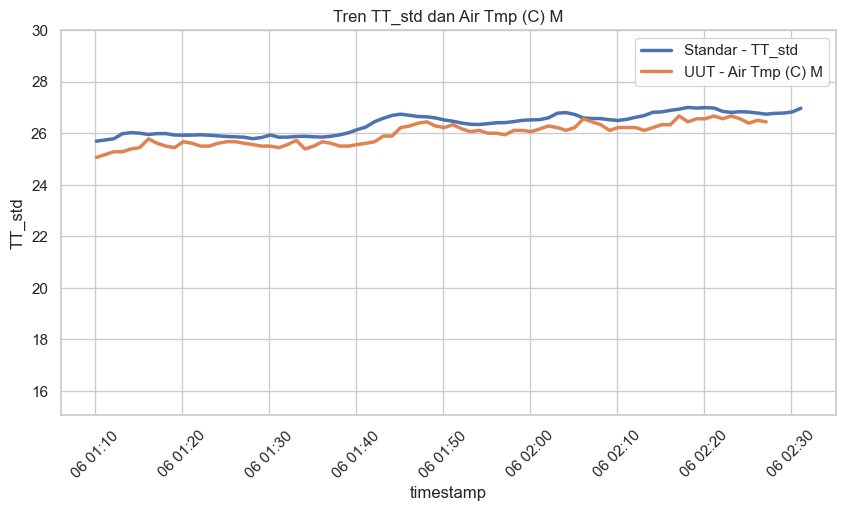

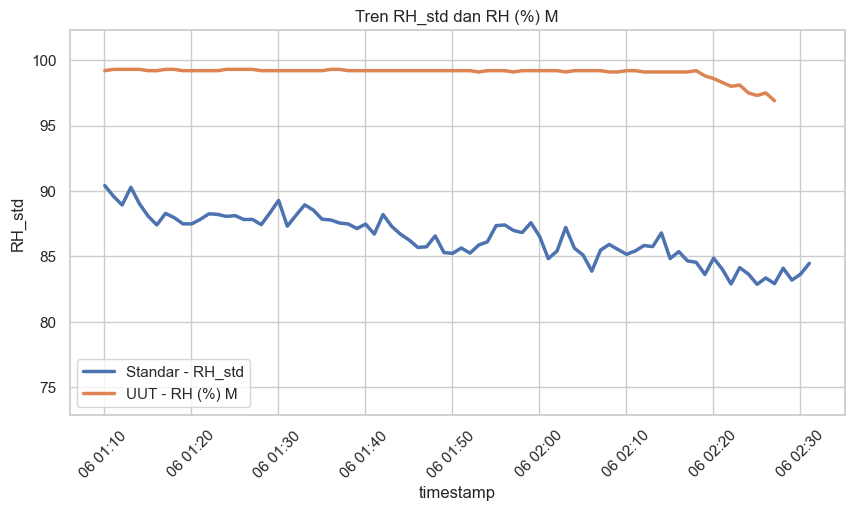

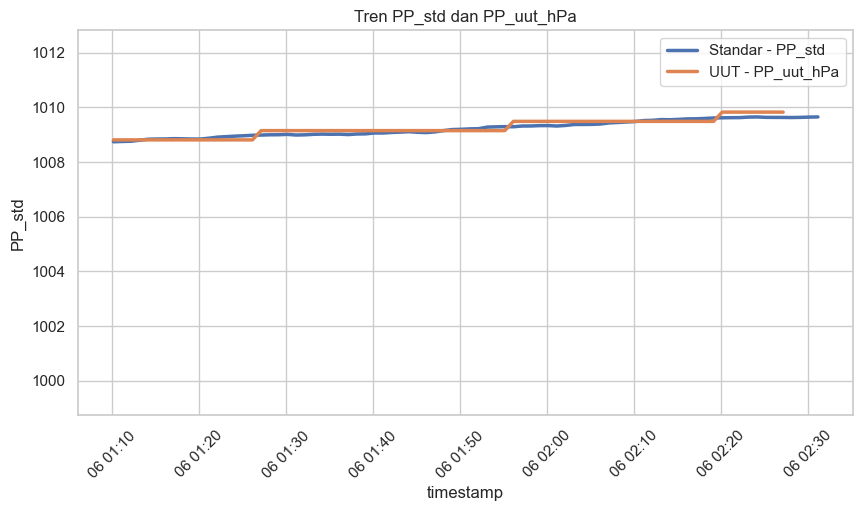

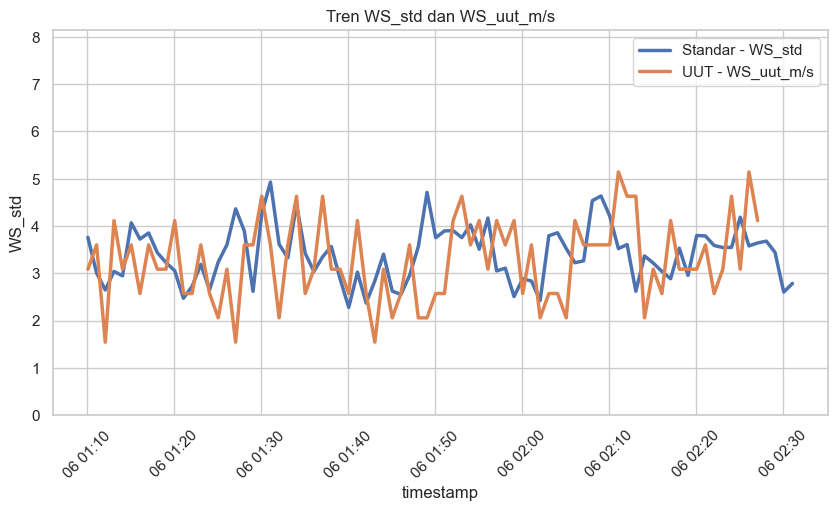

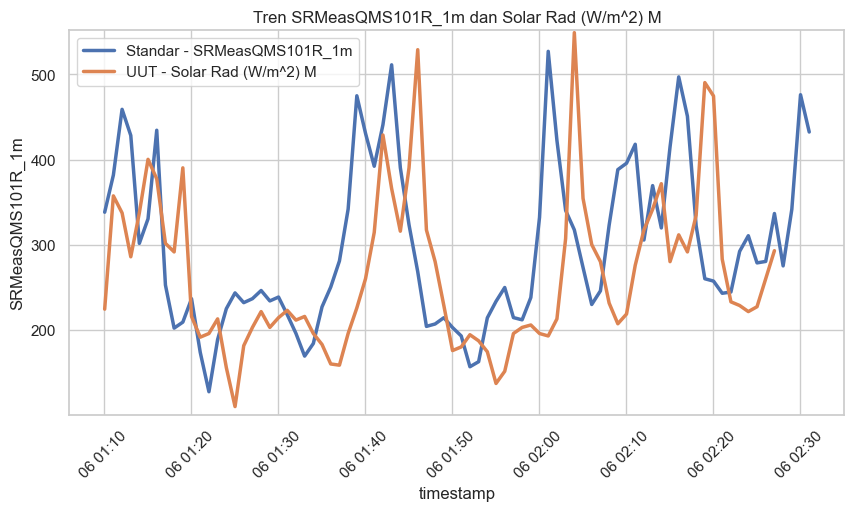

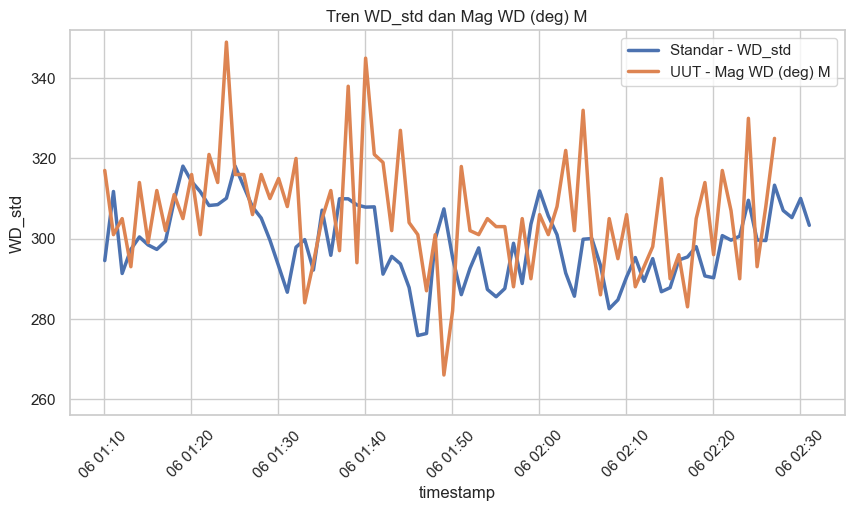

In [422]:
plot_list = [TT_col,RH_col, PP_col, WS_col, SR_col, WD_col]
for param in plot_list:
    plot_data(param[0],param[1],df_merged)